# Anomaly Detection Project

## Project Scenario 

Hello,

I have some questions for you that I need to be answered before the board meeting Friday afternoon. I need to be able to speak to the following questions. I also need a single slide that I can incorporate into my existing presentation (Google Slides) that summarizes the most important points. My questions are listed below; however, if you discover anything else important that I didn’t think to ask, please include that as well.

1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?
3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?
5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?
6. What topics are grads continuing to reference after graduation and into their jobs (for each program)?
7. Which lessons are least accessed?
8. Anything else I should be aware of?

### Further Instructions 

- To turn in your project, email datascience@codeup.com with the subject line "Anomaly Detection Project"

- To get 100 on this project you only need to answer **5 out of the 7 questions** (along with the other deliverables listed below i.e. slide, your notebook, etc).

- Submit a link to a final notebook on GitHub that asks and answers questions - document the work you do to justify findings

- Compose an email with the answers to the questions/your findings, and in the email, include the link to your notebook in GitHub and attach your slide.

- You will not present this, so be sure that the details you need your leader to convey/understand are clearly communicated in the email.

- Your slide should be like an executive summary and be in form to present.

- Continue to use best practices of acquire.py, prepare.py, etc.

- Since there is no modeling to be done for this project, there is no need to split the data into train/validate/test

## Import Libraries

In [326]:
#Pandas
import pandas as pd

#Numpy
import numpy as np 

#Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

#Import acquire and prepare
from acquire import get_cohort_data
from prepare import prepare_data

#Disable warnings 
import warnings
warnings.filterwarnings('ignore')

#Stats
from scipy import stats

## Acquire

In [3]:
df = get_cohort_data()

In [4]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,None,1.0
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,None,2.0


In [5]:
df.describe()

,user_id,cohort_id,id,program_id
count,900223.000000,847330.000000,847330.000000,847330.000000
mean,458.825707,48.501049,48.501049,2.086004
std,249.296767,32.795482,32.795482,0.388231
min,1.000000,1.000000,1.000000,1.000000
25%,269.000000,28.000000,28.000000,2.000000
50%,475.000000,33.000000,33.000000,2.000000
75%,660.000000,57.000000,57.000000,2.000000
max,981.000000,139.000000,139.000000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900223 entries, 0 to 900222
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        900223 non-null  object 
 1   time        900223 non-null  object 
 2   path        900222 non-null  object 
 3   user_id     900223 non-null  int64  
 4   cohort_id   847330 non-null  float64
 5   ip          900223 non-null  object 
 6   id          847330 non-null  float64
 7   name        847330 non-null  object 
 8   slack       847330 non-null  object 
 9   start_date  847330 non-null  object 
 10  end_date    847330 non-null  object 
 11  created_at  847330 non-null  object 
 12  updated_at  847330 non-null  object 
 13  deleted_at  0 non-null       object 
 14  program_id  847330 non-null  float64
dtypes: float64(3), int64(1), object(11)
memory usage: 103.0+ MB


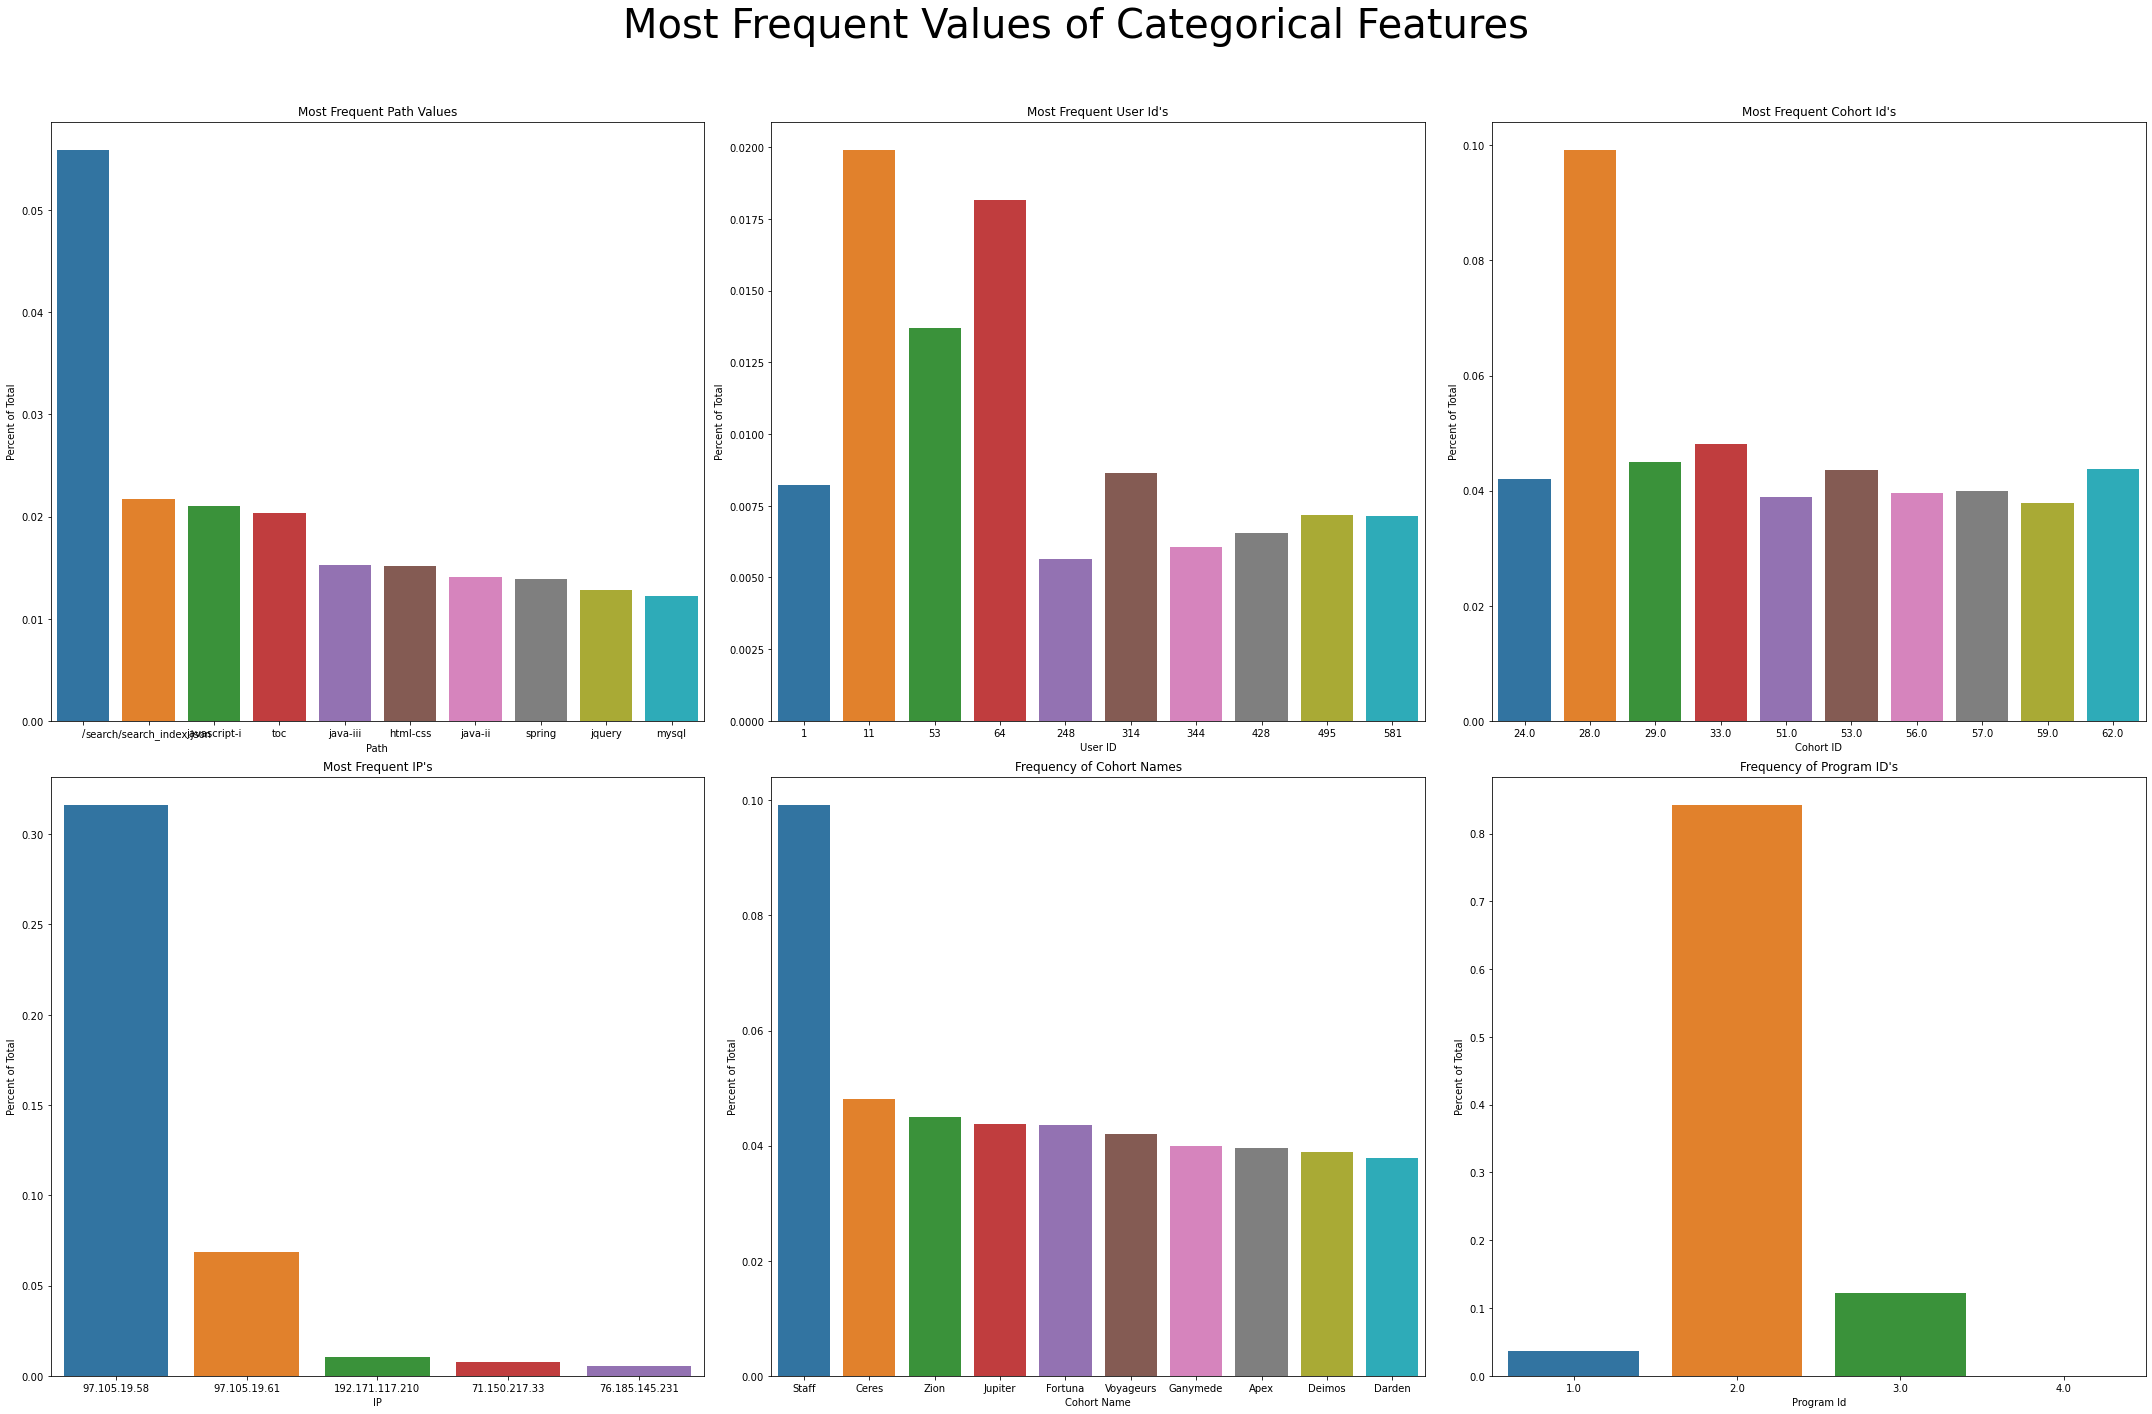

In [16]:
fig, axs = plt.subplots(ncols=3, nrows = 2, figsize = (30, 20))
fig.suptitle('Most Frequent Values of Categorical Features', fontsize = 40)
#Path
sns.barplot(x='index', y='path', data=df['path'].value_counts(normalize=True).reset_index().sort_values(
        by='path', ascending=False).head(10), ax=axs[0, 0]).set(title = "Most Frequent Path Values", xlabel = "Path", ylabel = "Percent of Total")
#User ID
sns.barplot(x='index', y='user_id', data=df['user_id'].value_counts(normalize=True).reset_index().sort_values(
        by='user_id', ascending=False).head(10), ax=axs[0, 1]).set(Title = "Most Frequent User Id's", xlabel = "User ID", ylabel = "Percent of Total")
#Cohort ID
sns.barplot(x='index', y='cohort_id', data=df['cohort_id'].value_counts(normalize=True).reset_index().sort_values(
        by='cohort_id', ascending=False).head(10), ax=axs[0, 2]).set(Title = "Most Frequent Cohort Id's", xlabel = "Cohort ID", ylabel = "Percent of Total")
#IP Address
sns.barplot(x='index', y='ip', data=df['ip'].value_counts(normalize=True).reset_index().sort_values(
        by='ip', ascending=False).head(5), ax=axs[1, 0]).set(Title = "Most Frequent IP's", xlabel = "IP", ylabel = "Percent of Total")
#Cohort Names
sns.barplot(x='index', y='name', data=df['name'].value_counts(normalize=True).reset_index().sort_values(
        by='name', ascending=False).head(10), ax=axs[1, 1]).set(Title = "Frequency of Cohort Names", xlabel = "Cohort Name", ylabel = "Percent of Total")
#Program ID
sns.barplot(x='index', y='program_id', data=df['program_id'].value_counts(normalize=True).reset_index().sort_values(
        by='program_id', ascending=False), ax=axs[1, 2]).set(Title = "Frequency of Program ID's", xlabel = "Program Id", ylabel = "Percent of Total")

fig.tight_layout()
fig.subplots_adjust(top=0.9)

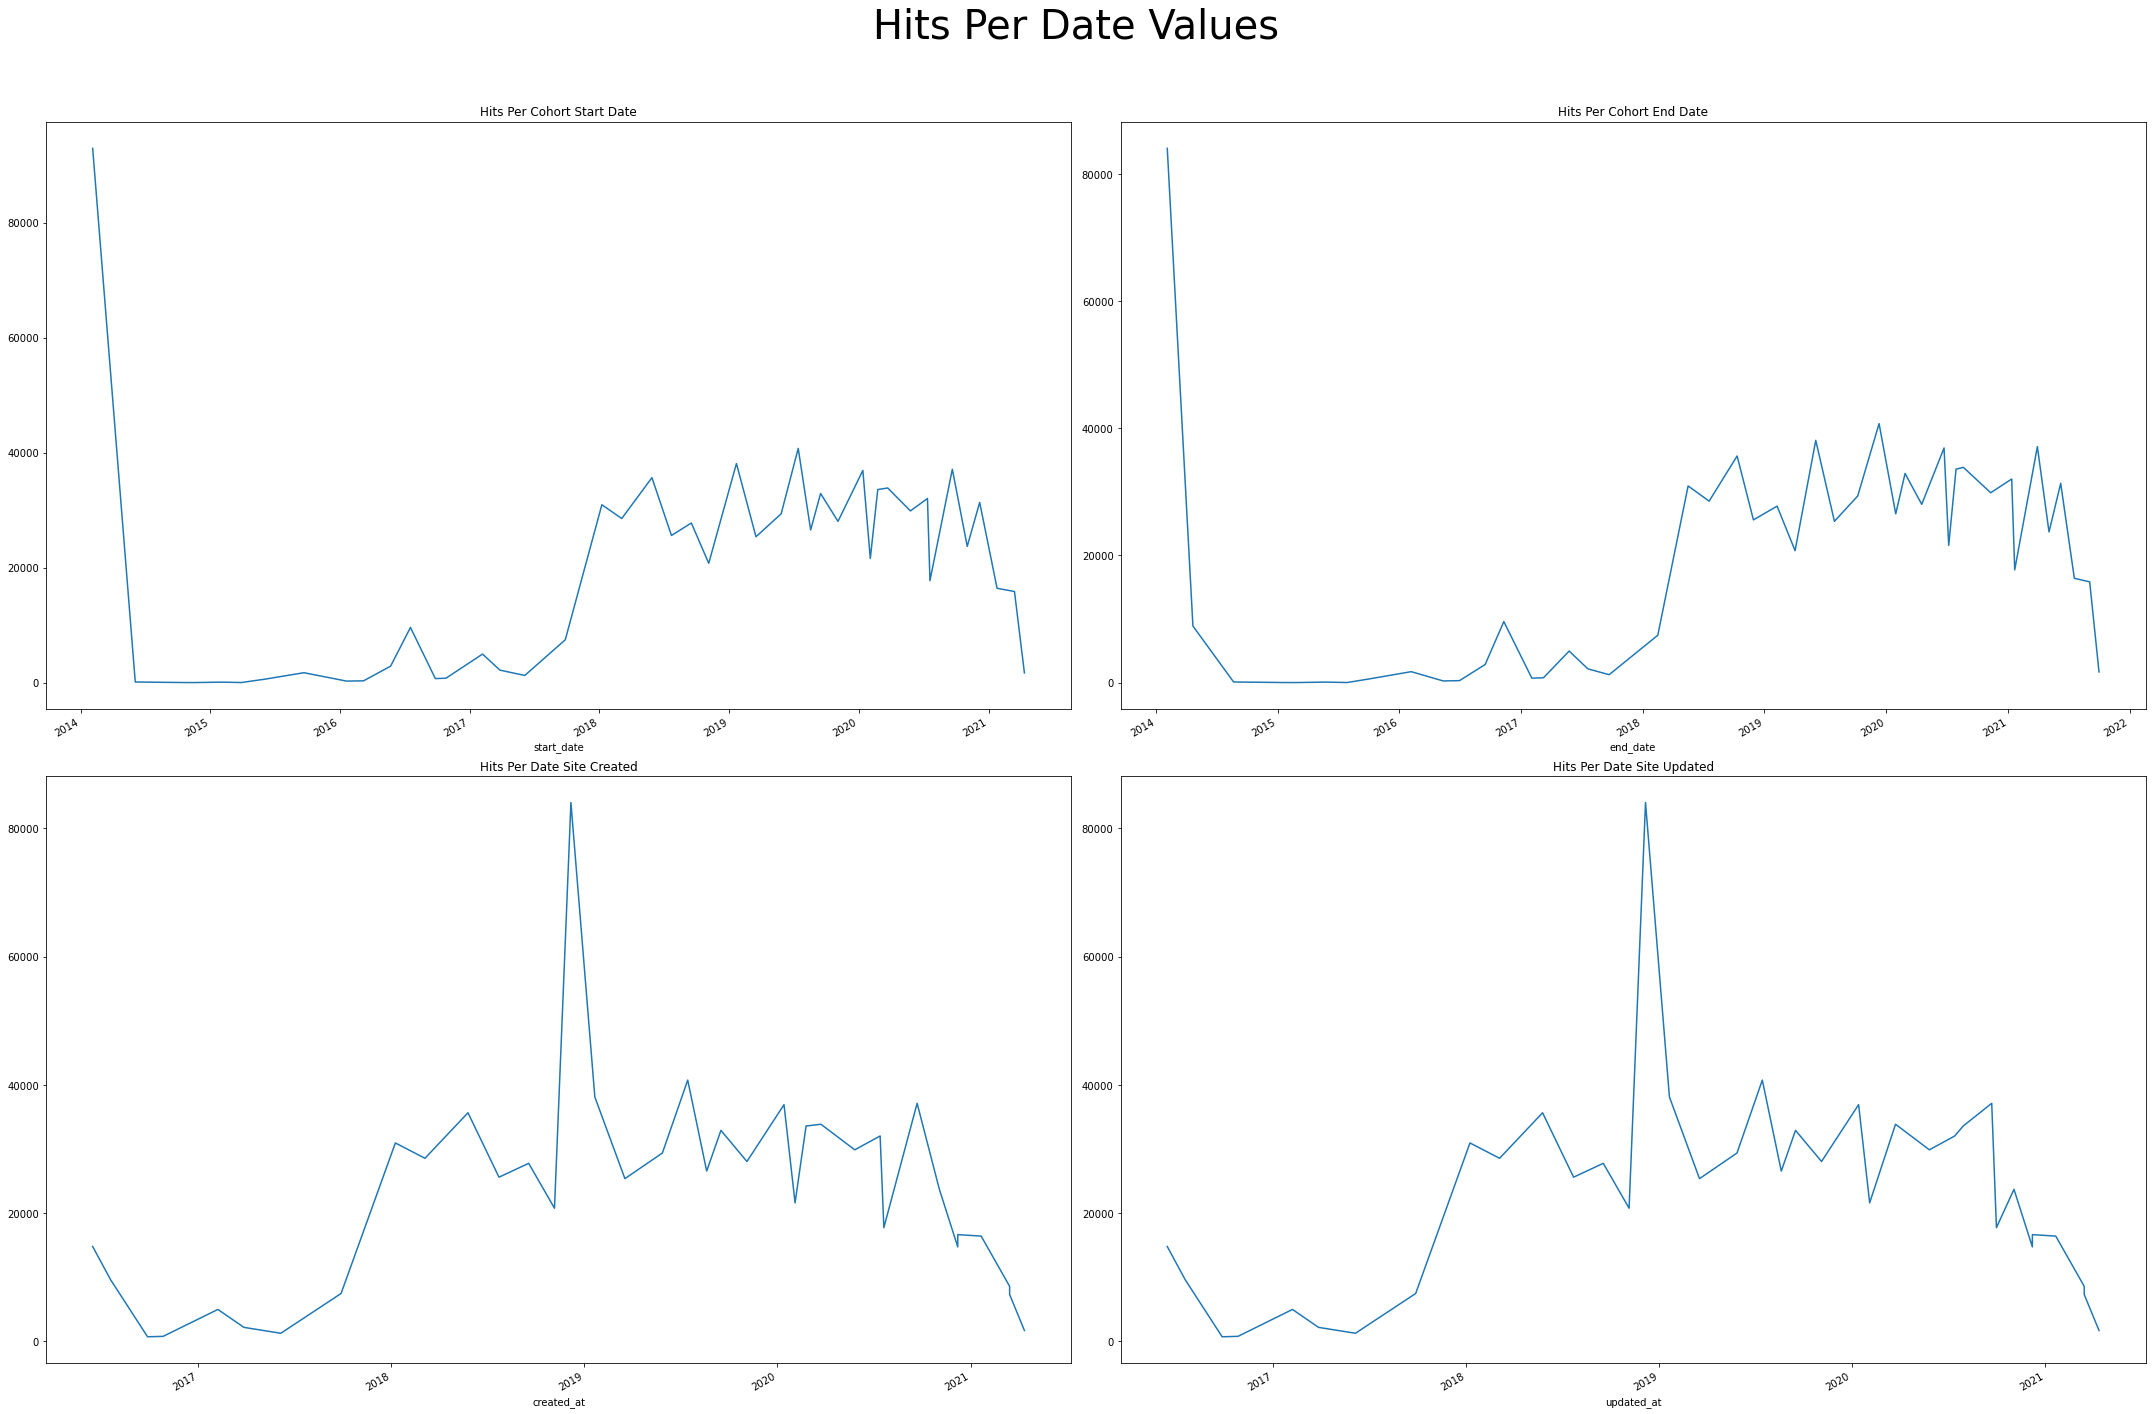

In [38]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (30, 20))
fig.suptitle('Hits Per Date Values', fontsize = 40)

df.groupby('start_date').ip.count().plot(ax=axs[0, 0]).set(Title = "Hits Per Cohort Start Date")

df.groupby('end_date').ip.count().plot(ax=axs[0, 1]).set(Title = "Hits Per Cohort End Date")

df.groupby('created_at').ip.count().plot(ax=axs[1, 0]).set(Title = "Hits Per Date Site Created")

df.groupby('updated_at').ip.count().plot(ax=axs[1, 1]).set(Title = "Hits Per Date Site Updated")

fig.tight_layout()
fig.subplots_adjust(top=0.9)


## Prepare

In [17]:
df = prepare_data(df)

In [18]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8.0,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-01-26 09:56:24,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22.0,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,2.0


## Question 1

In this section, we will explore the data to answer the question:
   - Which lesson appears to attract the most traffic consistently across cohorts (per program)?

In [138]:
cohort = df.groupby(['cohort_id'])['path'].agg(lambda x:x.value_counts().index[0])

In [139]:
cohort = pd.DataFrame(cohort)

In [140]:
cohort

,path
cohort_id,
1.0,/
2.0,/
4.0,/
5.0,/
6.0,javascript-ii/es6
7.0,/
8.0,/
9.0,content/html-css
11.0,/


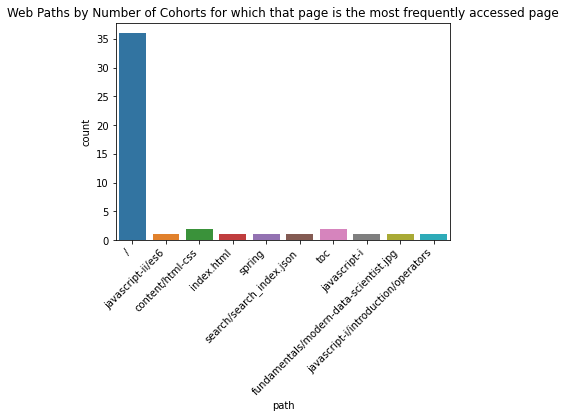

In [143]:
most_frequent_page = sns.countplot(cohort.path)
ticks = plt.setp(most_frequent_page.get_xticklabels(), rotation = 45, horizontalalignment='right')
title = most_frequent_page.set(Title = "Web Paths by Number of Cohorts for which that page is the most frequently accessed page")

In [147]:
path_given_program = (
    df.groupby(['program_id'])
    .path.value_counts(normalize=True)
    .rename('proba_status_program')
    .reset_index()
)

In [148]:
path_given_program

,program_id,path,proba_status_program
0,1.0,/,0.055028
1,1.0,index.html,0.033095
2,1.0,javascript-i,0.024093
3,1.0,html-css,0.017743
4,1.0,spring,0.016400
...,...,...,...
3304,3.0,where,0.000010
3305,4.0,content/html-css,0.400000
3306,4.0,/,0.200000
3307,4.0,content/html-css/gitbook/images/favicon.ico,0.200000


We will explore the most popular website paths for each program. 

First we will start will program 1.

In [152]:
program_1 = path_given_program[path_given_program.program_id == 1.0]

In [153]:
program_1.head(20)

,program_id,path,proba_status_program
0,1.0,/,0.055028
1,1.0,index.html,0.033095
2,1.0,javascript-i,0.024093
3,1.0,html-css,0.017743
4,1.0,spring,0.016400
5,1.0,java-iii,0.015680
6,1.0,java-ii,0.014862
7,1.0,java-i,0.014535
8,1.0,javascript-ii,0.014043
9,1.0,appendix,0.013389


Program 2.

In [156]:
program_2 = path_given_program[path_given_program.program_id == 2.0]
program_2.head(20)

,program_id,path,proba_status_program
710,2.0,/,0.050204
711,2.0,javascript-i,0.024471
712,2.0,toc,0.024431
713,2.0,search/search_index.json,0.021324
714,2.0,java-iii,0.017779
715,2.0,html-css,0.017619
716,2.0,java-ii,0.016428
717,2.0,spring,0.015947
718,2.0,jquery,0.014990
719,2.0,mysql,0.014464


Program 3

In [163]:
program_3 = path_given_program[path_given_program.program_id == 3.0]
program_3.head(20)

,program_id,path,proba_status_program
2623,3.0,/,0.080823
2624,3.0,search/search_index.json,0.021303
2625,3.0,classification/overview,0.017261
2626,3.0,1-fundamentals/modern-data-scientist.jpg,0.016004
2627,3.0,1-fundamentals/AI-ML-DL-timeline.jpg,0.015965
2628,3.0,1-fundamentals/1.1-intro-to-data-science,0.015791
2629,3.0,classification/scale_features_or_not.svg,0.015376
2630,3.0,fundamentals/AI-ML-DL-timeline.jpg,0.013954
2631,3.0,fundamentals/modern-data-scientist.jpg,0.013906
2632,3.0,sql/mysql-overview,0.013770


In [158]:
program_4 = path_given_program[path_given_program.program_id == 4.0]
program_4.head(20)

,program_id,path,proba_status_program
3305,4.0,content/html-css,0.4
3306,4.0,/,0.2
3307,4.0,content/html-css/gitbook/images/favicon.ico,0.2
3308,4.0,content/html-css/introduction.html,0.2


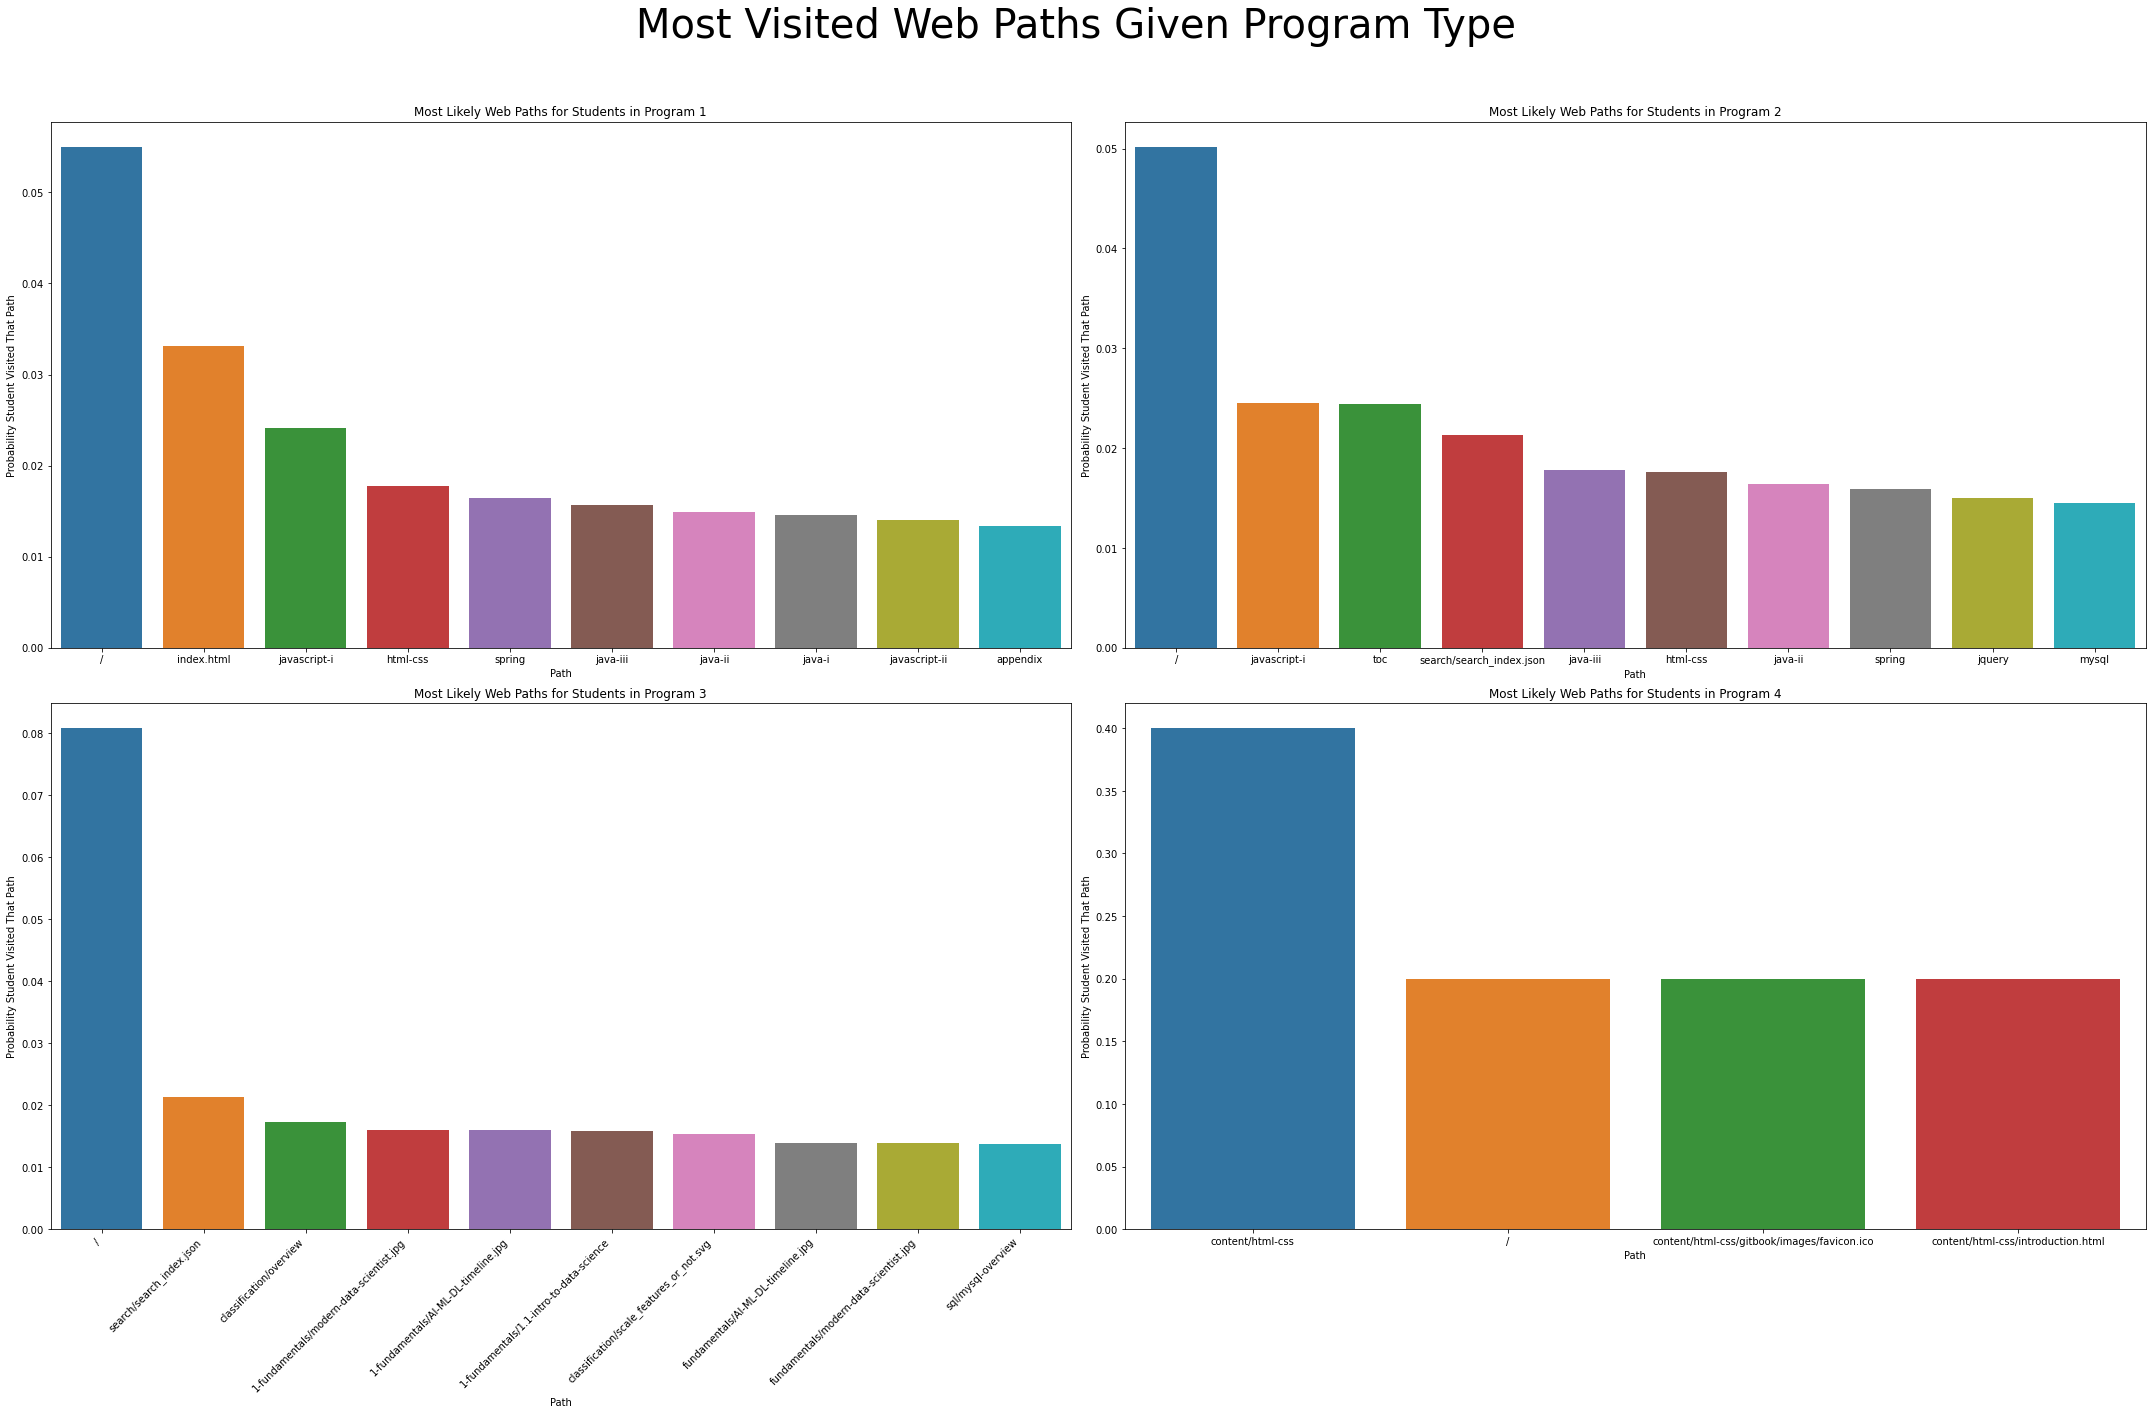

In [165]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (30, 20))
fig.suptitle('Most Visited Web Paths Given Program Type', fontsize = 40)
#Program 1
sns.barplot(x='path', y='proba_status_program', data=program_1.head(10), ax=axs[0, 0]).set(title = "Most Likely Web Paths for Students in Program 1", xlabel = "Path", ylabel = "Probability Student Visited That Path")

#Program 2
sns.barplot(x='path', y='proba_status_program', data=program_2.head(10), ax=axs[0, 1]).set(title = "Most Likely Web Paths for Students in Program 2", xlabel = "Path", ylabel = "Probability Student Visited That Path")

#Program 3
program_3_graph = sns.barplot(x='path', y='proba_status_program', data=program_3.head(10), ax=axs[1, 0])
ticks = plt.setp(program_3_graph.get_xticklabels(), rotation = 45, horizontalalignment='right')
program_3_graph.set(title = "Most Likely Web Paths for Students in Program 3", xlabel = "Path", ylabel = "Probability Student Visited That Path")


#Program 4
sns.barplot(x='path', y='proba_status_program', data=program_4, ax=axs[1, 1]).set(title = "Most Likely Web Paths for Students in Program 4", xlabel = "Path", ylabel = "Probability Student Visited That Path")

fig.tight_layout()
fig.subplots_adjust(top=0.9)

## Question 2

Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

**Note** 

Although our `cohort_id` values range from 0 to 137, there are only 41 unique `cohort_id` values.

In [438]:
df.cohort_id.min()

1.0

In [439]:
df.cohort_id.max()

139.0

In [440]:
len(df.cohort_id.unique())

47

In [441]:
path_given_program_and_cohort = (
    df.groupby(['program_id', 'cohort_id'])
    .path.value_counts(normalize=True)
    .rename('proba_path_program')
    .reset_index()
)

In [442]:
path_given_program_and_cohort

,program_id,cohort_id,path,proba_path_program
0,1.0,1.0,/,0.070416
1,1.0,1.0,javascript-i,0.033071
2,1.0,1.0,html-css,0.024184
3,1.0,1.0,javascript-ii,0.022947
4,1.0,1.0,spring,0.021597
...,...,...,...,...
13560,3.0,137.0,where,0.000117
13561,4.0,9.0,content/html-css,0.400000
13562,4.0,9.0,/,0.200000
13563,4.0,9.0,content/html-css/gitbook/images/favicon.ico,0.200000


In [443]:
#Program 1
program_1 = path_given_program_and_cohort[path_given_program_and_cohort.program_id == 1.0]
#Program 2
program_2 = path_given_program_and_cohort[path_given_program_and_cohort.program_id == 2.0]
#Program 3
program_3 = path_given_program_and_cohort[path_given_program_and_cohort.program_id == 3.0]
#Program 4
program_4 = path_given_program_and_cohort[path_given_program_and_cohort.program_id == 4.0]

### Program 1

In [444]:
program_1.head()

,program_id,cohort_id,path,proba_path_program
0,1.0,1.0,/,0.070416
1,1.0,1.0,javascript-i,0.033071
2,1.0,1.0,html-css,0.024184
3,1.0,1.0,javascript-ii,0.022947
4,1.0,1.0,spring,0.021597


First, we will investigate the question of whether certain cohorts visit certain webpages more often by seeing how many times each webpage appears in each cohort's top 5 most visited page.

In [445]:
top_five = program_1.groupby("cohort_id").head(5)
top_five.head()

,program_id,cohort_id,path,proba_path_program
0,1.0,1.0,/,0.070416
1,1.0,1.0,javascript-i,0.033071
2,1.0,1.0,html-css,0.024184
3,1.0,1.0,javascript-ii,0.022947
4,1.0,1.0,spring,0.021597


Now we'll count how many times each webpage appears in each cohort's top five.

In [446]:
times_in_top_5 = pd.DataFrame(top_ten.path.value_counts())
times_in_top_5.head()

,path
/,11
html-css,5
content/html-css,4
javascript-i,3
java-i,3


We'll look at the values that only appear in one cohort's top five.

In [447]:
times_in_top_5[times_in_top_5.path == 1]

,path
content/html-css/elements.html,1
content/javascript,1
content/php_ii/command-line/io-streams.html,1
content/php_ii/control-structures-i,1
content/mysql/intro-to-mysql,1
content/php_ii/command-line,1
appendix,1
prework/databases,1
mkdocs/search_index.json,1
javascript-i/introduction/working-with-data-types-operators-and-variables,1


We'll make these webpaths into a list.

In [448]:
webpaths = times_in_top_5[times_in_top_5.path == 1].index.to_list()
webpaths

['content/html-css/elements.html',
 'content/javascript',
 'content/php_ii/command-line/io-streams.html',
 'content/php_ii/control-structures-i',
 'content/mysql/intro-to-mysql',
 'content/php_ii/command-line',
 'appendix',
 'prework/databases',
 'mkdocs/search_index.json',
 'javascript-i/introduction/working-with-data-types-operators-and-variables',
 'content/laravel/intro/gitbook/images/favicon.ico',
 'javascript-ii',
 'html-css/elements',
 'prework/versioning/github',
 'content/laravel/intro/environment.html',
 'content/php_i',
 'javascript-ii/es6',
 'jquery',
 'html-css/introduction']

Then we'll create a DataFrame with just these webpaths.

In [449]:
only_in_top_5_once = program_1[program_1.path.isin(webpaths)]
only_in_top_5_once

,program_id,cohort_id,path,proba_path_program
3,1.0,1.0,javascript-ii,0.022947
7,1.0,1.0,appendix,0.014961
8,1.0,1.0,jquery,0.014961
13,1.0,1.0,html-css/elements,0.009786
34,1.0,1.0,javascript-i/introduction/working-with-data-ty...,0.007987
...,...,...,...,...
2458,1.0,19.0,content/php_ii/command-line,0.001617
2466,1.0,19.0,javascript-ii/es6,0.001617
2530,1.0,19.0,content/php_ii/command-line/io-streams.html,0.000808
2554,1.0,19.0,javascript-i/introduction/working-with-data-ty...,0.000808


We'll find the max probability for each of these webpaths. These cohorts likely visit these webpaths more than other cohorts.

In [450]:
unusual_values = only_in_top_5_once[only_in_top_5_once.proba_path_program.isin(only_in_top_5_once.groupby('path')['proba_path_program'].max())]
unusual_values

,program_id,cohort_id,path,proba_path_program
343,1.0,2.0,content/php_ii/command-line,0.064516
344,1.0,2.0,content/php_i,0.053763
345,1.0,2.0,content/php_ii/command-line/io-streams.html,0.053763
346,1.0,2.0,content/php_ii/control-structures-i,0.053763
387,1.0,4.0,mkdocs/search_index.json,0.250000
388,1.0,4.0,prework/databases,0.250000
389,1.0,4.0,prework/versioning/github,0.250000
391,1.0,6.0,javascript-ii/es6,0.138889
399,1.0,6.0,javascript-ii,0.027778
400,1.0,6.0,jquery,0.027778


Another way to see if a cohort is viewing a webpage more than the usual is to compare that cohort's behavior to the average.

We'll calculate the average probabilities for viewing each webpage.

In [451]:
average_probability = program_1.groupby('path')['proba_path_program'].mean()
average_probability = pd.DataFrame(average_probability)
average_probability = average_probability.rename(columns = {"proba_path_program": "Average"})
average_probability.head()

,Average
path,
/,0.163896
0_Classification_Algorithms,0.000348
1-fundamentals/1.1-intro-to-data-science,0.004476
1-fundamentals/2.4-more-excel-features,0.000808
1-fundamentals/AI-ML-DL-timeline.jpg,0.004476


Now we'll merge our two DataFrames.

In [452]:
program_1 = pd.merge(program_1, average_probability, on = "path")
program_1.head()

,program_id,cohort_id,path,proba_path_program,Average
0,1.0,1.0,/,0.070416,0.163896
1,1.0,2.0,/,0.182796,0.163896
2,1.0,4.0,/,0.250000,0.163896
3,1.0,5.0,/,1.000000,0.163896
4,1.0,6.0,/,0.055556,0.163896


Now let's look at the difference between the cohort's probability and the average probability.

In [453]:
program_1['difference'] = program_1['proba_path_program'] - program_1['Average']
program_1.head()

,program_id,cohort_id,path,proba_path_program,Average,difference
0,1.0,1.0,/,0.070416,0.163896,-0.093480
1,1.0,2.0,/,0.182796,0.163896,0.018899
2,1.0,4.0,/,0.250000,0.163896,0.086104
3,1.0,5.0,/,1.000000,0.163896,0.836104
4,1.0,6.0,/,0.055556,0.163896,-0.108341


In [457]:
program_1.sort_values(by = "difference", ascending = False).head(20)

,program_id,cohort_id,path,proba_path_program,Average,difference
3,1.0,5.0,/,1.000000,0.163896,0.836104
377,1.0,4.0,mkdocs/search_index.json,0.250000,0.039187,0.210813
1702,1.0,4.0,prework/databases,0.250000,0.063530,0.186470
1825,1.0,4.0,prework/versioning/github,0.250000,0.125292,0.124708
281,1.0,6.0,javascript-ii/es6,0.138889,0.019895,0.118994
2,1.0,4.0,/,0.250000,0.163896,0.086104
1689,1.0,14.0,index.html,0.091478,0.022801,0.068677
1721,1.0,2.0,content/php_ii/command-line,0.064516,0.014315,0.050201
1620,1.0,2.0,content/php_ii/control-structures-i,0.053763,0.011123,0.042640
1726,1.0,2.0,content/php_ii/command-line/io-streams.html,0.053763,0.011520,0.042244


In [489]:
different_from_average = program_1.sort_values(by = "difference", ascending = False).head(5)

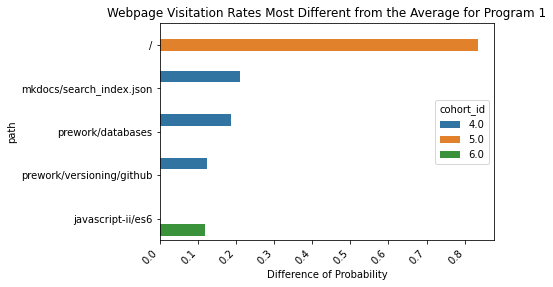

In [490]:
program_1_difference = sns.barplot(y = different_from_average.path, x = different_from_average.difference, hue = different_from_average.cohort_id)
ticks = plt.setp(program_1_difference.get_xticklabels(), rotation = 45, horizontalalignment='right')
labels = program_1_difference.set(Title = "Webpage Visitation Rates Most Different from the Average for Program 1", xlabel = "Difference of Probability")

The DataFrame and graphs above indicate cohorts that are visiting webpages significantly more than the average.

### Program 2

In [468]:
program_2.head()

,program_id,cohort_id,path,proba_path_program
2568,2.0,15.0,/,0.047757
2569,2.0,15.0,java-i,0.027496
2570,2.0,15.0,java-iii,0.018813
2571,2.0,15.0,spring,0.017366
2572,2.0,15.0,spring/fundamentals/controllers,0.017366


In [469]:
average = program_2.groupby("path")['proba_path_program'].mean()
average = pd.DataFrame(average)
average = average.rename(columns = {"proba_path_program": "Average"})
average.head()

,Average
path,
',0.000012
.git,0.000028
.gitignore,0.000028
.well-known/assetlinks.json,0.000067
/,0.050718


In [470]:
median = program_2.groupby("path")['proba_path_program'].median()
median = pd.DataFrame(median)
median = median.rename(columns = {"proba_path_program": "Median"})
median.head()

,Median
path,
',0.000012
.git,0.000028
.gitignore,0.000028
.well-known/assetlinks.json,0.000067
/,0.046746


In [471]:
program_2 = pd.merge(program_2, average, on = "path")
program_2.head()

,program_id,cohort_id,path,proba_path_program,Average
0,2.0,15.0,/,0.047757,0.050718
1,2.0,16.0,/,0.049007,0.050718
2,2.0,18.0,/,0.069045,0.050718
3,2.0,21.0,/,0.084632,0.050718
4,2.0,22.0,/,0.059109,0.050718


In [472]:
program_2 = pd.merge(program_2, median, on = "path")
program_2.head()

,program_id,cohort_id,path,proba_path_program,Average,Median
0,2.0,15.0,/,0.047757,0.050718,0.046746
1,2.0,16.0,/,0.049007,0.050718,0.046746
2,2.0,18.0,/,0.069045,0.050718,0.046746
3,2.0,21.0,/,0.084632,0.050718,0.046746
4,2.0,22.0,/,0.059109,0.050718,0.046746


In [473]:
program_2['difference_mean'] = program_2['proba_path_program'] - program_2['Average']

In [474]:
program_2.sort_values(by = "difference_mean", ascending = False).head(20)

,program_id,cohort_id,path,proba_path_program,Average,Median,difference_mean
4691,2.0,139.0,javascript-i/introduction/operators,0.107057,0.010969,0.006632,0.096088
4718,2.0,139.0,javascript-i/introduction/primitive-types,0.105861,0.010350,0.005895,0.095512
1680,2.0,139.0,javascript-i/functions,0.102273,0.013535,0.009540,0.088738
2969,2.0,139.0,javascript-i/conditionals,0.086124,0.011499,0.008005,0.074626
4772,2.0,139.0,javascript-i/introduction/working-with-data-ty...,0.087321,0.014012,0.009673,0.073309
85,2.0,16.0,spring,0.086093,0.018290,0.016715,0.067803
2775,2.0,16.0,index.html,0.083444,0.018147,0.004347,0.065296
2068,2.0,139.0,javascript-i/javascript-with-html,0.074761,0.012852,0.009618,0.061909
598,2.0,139.0,javascript-i,0.081340,0.027589,0.024525,0.053751
4745,2.0,139.0,javascript-i/introduction/variables,0.056818,0.007880,0.005426,0.048938


In [475]:
program_2['difference_median'] = program_2['proba_path_program'] - program_2['Median']

In [476]:
program_2.sort_values(by = "difference_median", ascending = False).head(20)

,program_id,cohort_id,path,proba_path_program,Average,Median,difference_mean,difference_median
4691,2.0,139.0,javascript-i/introduction/operators,0.107057,0.010969,0.006632,0.096088,0.100425
4718,2.0,139.0,javascript-i/introduction/primitive-types,0.105861,0.010350,0.005895,0.095512,0.099966
1680,2.0,139.0,javascript-i/functions,0.102273,0.013535,0.009540,0.088738,0.092733
2775,2.0,16.0,index.html,0.083444,0.018147,0.004347,0.065296,0.079096
2969,2.0,139.0,javascript-i/conditionals,0.086124,0.011499,0.008005,0.074626,0.078120
4772,2.0,139.0,javascript-i/introduction/working-with-data-ty...,0.087321,0.014012,0.009673,0.073309,0.077648
85,2.0,16.0,spring,0.086093,0.018290,0.016715,0.067803,0.069377
2068,2.0,139.0,javascript-i/javascript-with-html,0.074761,0.012852,0.009618,0.061909,0.065143
598,2.0,139.0,javascript-i,0.081340,0.027589,0.024525,0.053751,0.056815
4745,2.0,139.0,javascript-i/introduction/variables,0.056818,0.007880,0.005426,0.048938,0.051392


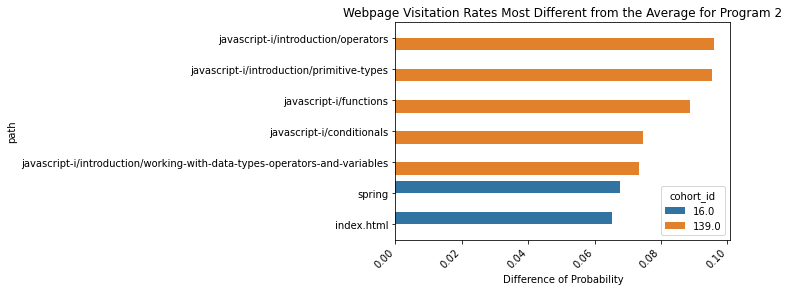

In [483]:
difference_from_mean = program_2.sort_values(by = "difference_mean", ascending = False).head(7)
difference_from_mean_plot = sns.barplot(y = difference_from_mean.path, x = difference_from_mean.difference_mean, hue = difference_from_mean.cohort_id)
ticks = plt.setp(difference_from_mean_plot.get_xticklabels(), rotation = 45, horizontalalignment='right')
labels = difference_from_mean_plot.set(Title = "Webpage Visitation Rates Most Different from the Average for Program 2", xlabel = "Difference of Probability")

### Program 3

In [336]:
program_3.head()

,program_id,cohort_id,path,proba_path_program
11798,3.0,34.0,/,0.074120
11799,3.0,34.0,1-fundamentals/modern-data-scientist.jpg,0.024493
11800,3.0,34.0,1-fundamentals/AI-ML-DL-timeline.jpg,0.024418
11801,3.0,34.0,1-fundamentals/1.1-intro-to-data-science,0.024116
11802,3.0,34.0,search/search_index.json,0.022157


In [191]:
program_3.cohort_id.value_counts()

34.0     533
59.0     420
55.0     418
133.0    230
137.0    162
Name: cohort_id, dtype: int64

In [491]:
average = program_3.groupby("path")['proba_path_program'].mean()
average = pd.DataFrame(average)
average = average.rename(columns = {"proba_path_program": "Average"})
average.head()

,Average
path,
%20https://github.com/RaulCPena,0.000046
",%20https://github.com/RaulCPena",0.000046
.gitignore,0.000031
/,0.078102
1-fundamentals,0.000312


In [492]:
median = program_3.groupby("path")['proba_path_program'].median()
median = pd.DataFrame(median)
median = median.rename(columns = {"proba_path_program": "Median"})
median.head()

,Median
path,
%20https://github.com/RaulCPena,0.000046
",%20https://github.com/RaulCPena",0.000046
.gitignore,0.000031
/,0.075773
1-fundamentals,0.000312


In [493]:
program_3 = pd.merge(program_3, average, on = "path")
program_3.head()

,program_id,cohort_id,path,proba_path_program,Average
0,3.0,34.0,/,0.074120,0.078102
1,3.0,55.0,/,0.079329,0.078102
2,3.0,59.0,/,0.093081,0.078102
3,3.0,133.0,/,0.075773,0.078102
4,3.0,137.0,/,0.068208,0.078102


In [494]:
program_3 = pd.merge(program_3, median, on = "path")
program_3.head()

,program_id,cohort_id,path,proba_path_program,Average,Median
0,3.0,34.0,/,0.074120,0.078102,0.075773
1,3.0,55.0,/,0.079329,0.078102,0.075773
2,3.0,59.0,/,0.093081,0.078102,0.075773
3,3.0,133.0,/,0.075773,0.078102,0.075773
4,3.0,137.0,/,0.068208,0.078102,0.075773


In [497]:
program_3['difference_mean'] = program_3['proba_path_program'] - program_3['Average']
program_3.sort_values(by = "difference_mean", ascending = False).head(20)

,program_id,cohort_id,path,proba_path_program,Average,Median,difference_mean
452,3.0,137.0,fundamentals/modern-data-scientist.jpg,0.073231,0.022829,0.009620,0.050402
447,3.0,137.0,fundamentals/AI-ML-DL-timeline.jpg,0.072880,0.022827,0.009777,0.050054
430,3.0,137.0,fundamentals/intro-to-data-science,0.071829,0.022405,0.009527,0.049424
746,3.0,133.0,classification/classical_programming_vs_machin...,0.029358,0.007828,0.001749,0.021530
469,3.0,137.0,python/data-types-and-variables,0.030133,0.009513,0.007951,0.020620
385,3.0,59.0,classification/overview,0.034640,0.015902,0.007008,0.018738
408,3.0,133.0,classification/scale_features_or_not.svg,0.031464,0.014686,0.007008,0.016778
816,3.0,137.0,fundamentals/DataToAction_v2.jpg,0.024293,0.007732,0.003717,0.016562
2,3.0,59.0,/,0.093081,0.078102,0.075773,0.014979
762,3.0,137.0,fundamentals/data-science-pipeline,0.022074,0.007206,0.003655,0.014869


In [499]:
program_3['difference_median'] = program_3['proba_path_program'] - program_3['Median']
program_3.sort_values(by = "difference_median", ascending = False).head(20)

,program_id,cohort_id,path,proba_path_program,Average,Median,difference_mean,difference_median
452,3.0,137.0,fundamentals/modern-data-scientist.jpg,0.073231,0.022829,0.009620,0.050402,0.063610
447,3.0,137.0,fundamentals/AI-ML-DL-timeline.jpg,0.072880,0.022827,0.009777,0.050054,0.063104
430,3.0,137.0,fundamentals/intro-to-data-science,0.071829,0.022405,0.009527,0.049424,0.062302
385,3.0,59.0,classification/overview,0.034640,0.015902,0.007008,0.018738,0.027632
746,3.0,133.0,classification/classical_programming_vs_machin...,0.029358,0.007828,0.001749,0.021530,0.027609
408,3.0,133.0,classification/scale_features_or_not.svg,0.031464,0.014686,0.007008,0.016778,0.024457
386,3.0,133.0,classification/overview,0.030241,0.015902,0.007008,0.014339,0.023234
407,3.0,59.0,classification/scale_features_or_not.svg,0.029455,0.014686,0.007008,0.014769,0.022447
469,3.0,137.0,python/data-types-and-variables,0.030133,0.009513,0.007951,0.020620,0.022182
816,3.0,137.0,fundamentals/DataToAction_v2.jpg,0.024293,0.007732,0.003717,0.016562,0.020576


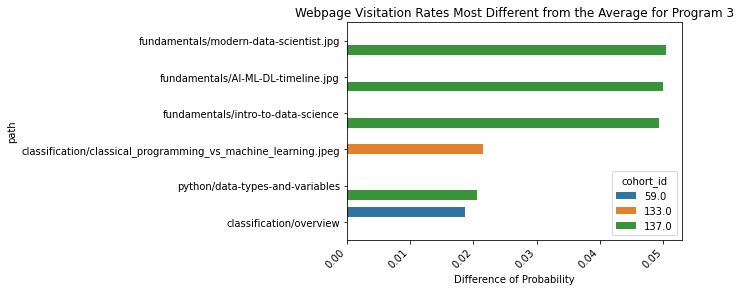

In [500]:
difference_from_mean = program_3.sort_values(by = "difference_mean", ascending = False).head(6)
difference_from_mean_plot = sns.barplot(y = difference_from_mean.path, x = difference_from_mean.difference_mean, hue = difference_from_mean.cohort_id)
ticks = plt.setp(difference_from_mean_plot.get_xticklabels(), rotation = 45, horizontalalignment='right')
labels = difference_from_mean_plot.set(Title = "Webpage Visitation Rates Most Different from the Average for Program 3", xlabel = "Difference of Probability")

### Program 4

In [509]:
program_4

,program_id,cohort_id,path,proba_path_program,Average,Median,difference_mean
0,4.0,9.0,content/html-css,0.4,0.026186,0.000798,0.373814
1,4.0,9.0,/,0.2,0.088112,0.055556,0.111888
2,4.0,9.0,content/html-css/gitbook/images/favicon.ico,0.2,0.011889,0.000584,0.188111
3,4.0,9.0,content/html-css/introduction.html,0.2,0.016030,0.000584,0.183970


In [178]:
program_4.cohort_id.value_counts()

9.0    4
Name: cohort_id, dtype: int64

Since there is only one cohort for Program 4, we will compare this cohort to the entire dataset.

In [502]:
average = path_given_program_and_cohort.groupby("path")['proba_path_program'].mean()
average = pd.DataFrame(average)
average = average.rename(columns = {"proba_path_program": "Average"})
average.head()

,Average
path,
%20https://github.com/RaulCPena,0.000046
',0.000012
",%20https://github.com/RaulCPena",0.000046
.git,0.000028
.gitignore,0.000030


In [503]:
median = path_given_program_and_cohort.groupby("path")['proba_path_program'].median()
median = pd.DataFrame(median)
median = median.rename(columns = {"proba_path_program": "Median"})
median.head()

,Median
path,
%20https://github.com/RaulCPena,0.000046
',0.000012
",%20https://github.com/RaulCPena",0.000046
.git,0.000028
.gitignore,0.000030


In [505]:
program_4 = pd.merge(program_4, average, on = "path")
program_4.head()

,program_id,cohort_id,path,proba_path_program,Average
0,4.0,9.0,content/html-css,0.4,0.026186
1,4.0,9.0,/,0.2,0.088112
2,4.0,9.0,content/html-css/gitbook/images/favicon.ico,0.2,0.011889
3,4.0,9.0,content/html-css/introduction.html,0.2,0.016030


In [506]:
program_4 = pd.merge(program_4, median, on = "path")
program_4.head()

,program_id,cohort_id,path,proba_path_program,Average,Median
0,4.0,9.0,content/html-css,0.4,0.026186,0.000798
1,4.0,9.0,/,0.2,0.088112,0.055556
2,4.0,9.0,content/html-css/gitbook/images/favicon.ico,0.2,0.011889,0.000584
3,4.0,9.0,content/html-css/introduction.html,0.2,0.016030,0.000584


In [519]:
program_4['difference_mean'] = program_4['proba_path_program'] - program_4['Average']
program_4.sort_values(by = "difference_mean", ascending = False)

,program_id,cohort_id,path,proba_path_program,Average,Median,difference_mean,difference_median
0,4.0,9.0,content/html-css,0.4,0.026186,0.000798,0.373814,0.399202
2,4.0,9.0,content/html-css/gitbook/images/favicon.ico,0.2,0.011889,0.000584,0.188111,0.199416
3,4.0,9.0,content/html-css/introduction.html,0.2,0.016030,0.000584,0.183970,0.199416
1,4.0,9.0,/,0.2,0.088112,0.055556,0.111888,0.144444


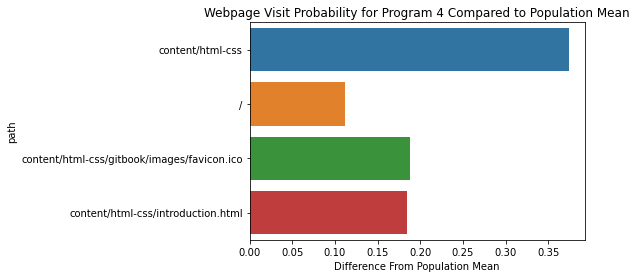

In [522]:
program_4_differences = sns.barplot(y = program_4.path, x = program_4.difference_mean)
labels = program_4_differences.set(title = "Webpage Visit Probability for Program 4 Compared to Population Mean", xlabel = "Difference From Population Mean")

In [523]:
program_4['difference_median'] = program_4['proba_path_program'] - program_4['Median']
program_4.sort_values(by = "difference_median", ascending = False)

,program_id,cohort_id,path,proba_path_program,Average,Median,difference_mean,difference_median
0,4.0,9.0,content/html-css,0.4,0.026186,0.000798,0.373814,0.399202
2,4.0,9.0,content/html-css/gitbook/images/favicon.ico,0.2,0.011889,0.000584,0.188111,0.199416
3,4.0,9.0,content/html-css/introduction.html,0.2,0.016030,0.000584,0.183970,0.199416
1,4.0,9.0,/,0.2,0.088112,0.055556,0.111888,0.144444


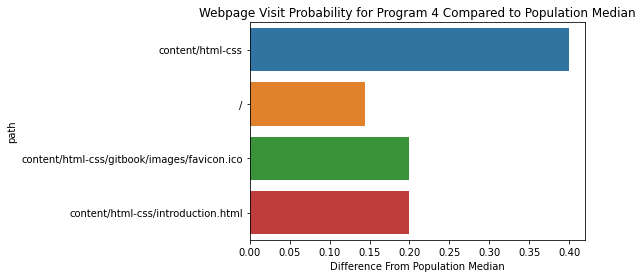

In [524]:
program_4_differences = sns.barplot(y = program_4.path, x = program_4.difference_median)
labels = program_4_differences.set(title = "Webpage Visit Probability for Program 4 Compared to Population Median", xlabel = "Difference From Population Median")

We only have four datapoints for Program 4, which is not enough data to draw a meaningful conclusion. 

## Question 3 

Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

In [547]:
times_each_user_appears = pd.DataFrame(df['user_id'].value_counts())

In [548]:
times_each_user_appears.head()

,user_id
11,17913
64,16322
53,12329
314,7783
1,7404


In [549]:
times_each_user_appears = times_each_user_appears.rename(columns = {'user_id': 'number'})
times_each_user_appears.head()

,number
11,17913
64,16322
53,12329
314,7783
1,7404


In [550]:
times_each_user_appears[times_each_user_appears.number == 1.0]

,number
652,1
212,1
918,1
66,1
952,1
879,1
619,1
940,1
163,1
592,1


In [553]:
less_than_five = times_each_user_appears[times_each_user_appears.number < 5.0]
less_than_five

,number
857,4
216,4
85,4
246,4
832,3
81,3
177,3
980,3
348,3
574,2


In [557]:
less_than_five_df = df[df.user_id.isin(less_than_five.index)]
less_than_five_df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,program_id
Time,,,,,,,,,,,,,,
2018-01-29 15:48:48,2018-01-29,15:48:48,/,66,13.0,67.198.116.192,13.0,Kings,#kings,2016-05-23,2016-09-15,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0
2018-02-03 12:04:16,2018-02-03,12:04:16,index.html,81,18.0,107.207.7.120,18.0,Pinnacles,#pinnacles,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,2.0
2018-02-03 12:04:21,2018-02-03,12:04:21,/,81,18.0,107.207.7.120,18.0,Pinnacles,#pinnacles,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,2.0
2018-02-03 12:04:45,2018-02-03,12:04:45,html-css,81,18.0,107.207.7.120,18.0,Pinnacles,#pinnacles,2017-03-27,2017-07-20,2017-03-28 00:33:12,2017-03-28 00:33:12,2.0
2018-02-04 11:21:38,2018-02-04,11:21:38,/,85,4.0,66.42.139.162,4.0,Denali,#denali,2014-10-20,2015-01-18,2016-06-14 19:52:26,2016-06-14 19:52:26,1.0


<AxesSubplot:xlabel='index', ylabel='path'>

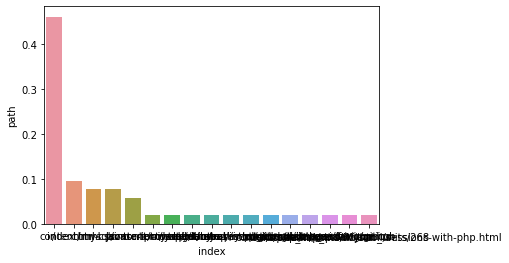

In [567]:
sns.barplot(x='index', y='path', data=less_than_five_df['path'].value_counts(normalize=True).reset_index().sort_values(
        by='path', ascending=False))

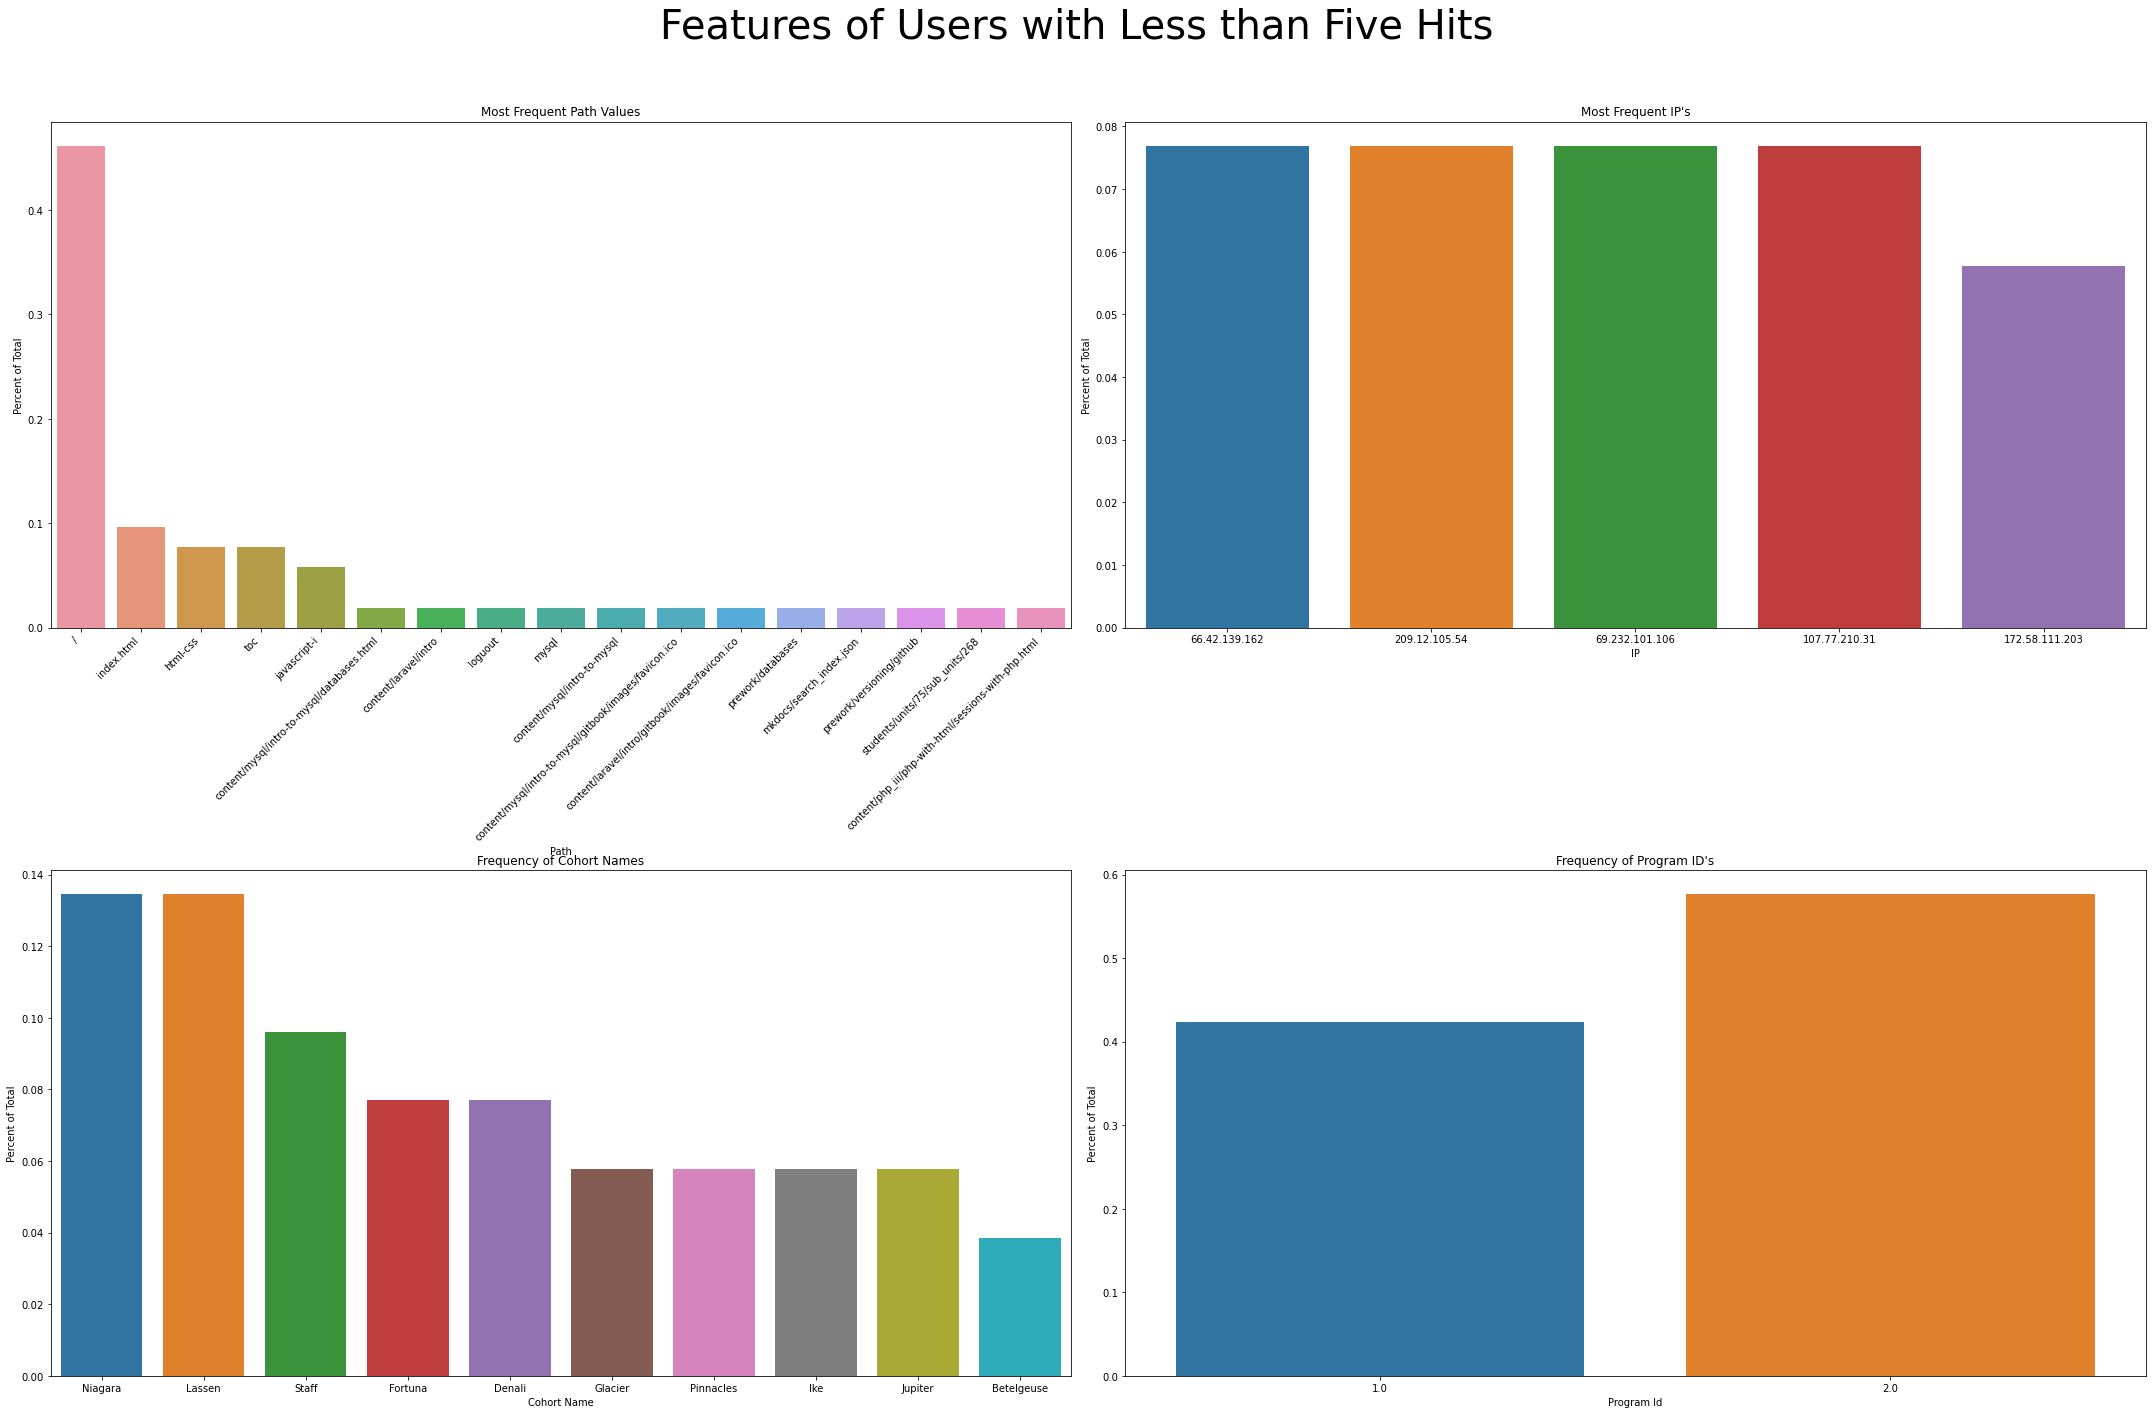

In [569]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (30, 20))
fig.suptitle('Features of Users with Less than Five Hits', fontsize = 40)
#Path
paths_for_less_than_five = sns.barplot(x='index', y='path', data=less_than_five_df['path'].value_counts(normalize=True).reset_index().sort_values(
        by='path', ascending=False), ax=axs[0,0])
ticks = plt.setp(paths_for_less_than_five.get_xticklabels(), rotation = 45, horizontalalignment='right')
paths_for_less_than_five.set(title = "Most Frequent Path Values", xlabel = "Path", ylabel = "Percent of Total")
#IP Address
sns.barplot(x='index', y='ip', data=less_than_five_df['ip'].value_counts(normalize=True).reset_index().sort_values(
        by='ip', ascending=False).head(5), ax=axs[0, 1]).set(Title = "Most Frequent IP's", xlabel = "IP", ylabel = "Percent of Total")
#Cohort Names
sns.barplot(x='index', y='name', data=less_than_five_df['name'].value_counts(normalize=True).reset_index().sort_values(
        by='name', ascending=False).head(10), ax=axs[1, 0]).set(Title = "Frequency of Cohort Names", xlabel = "Cohort Name", ylabel = "Percent of Total")
#Program ID
sns.barplot(x='index', y='program_id', data=less_than_five_df['program_id'].value_counts(normalize=True).reset_index().sort_values(
        by='program_id', ascending=False), ax=axs[1, 1]).set(Title = "Frequency of Program ID's", xlabel = "Program Id", ylabel = "Percent of Total")

fig.tight_layout()
fig.subplots_adjust(top=0.9)

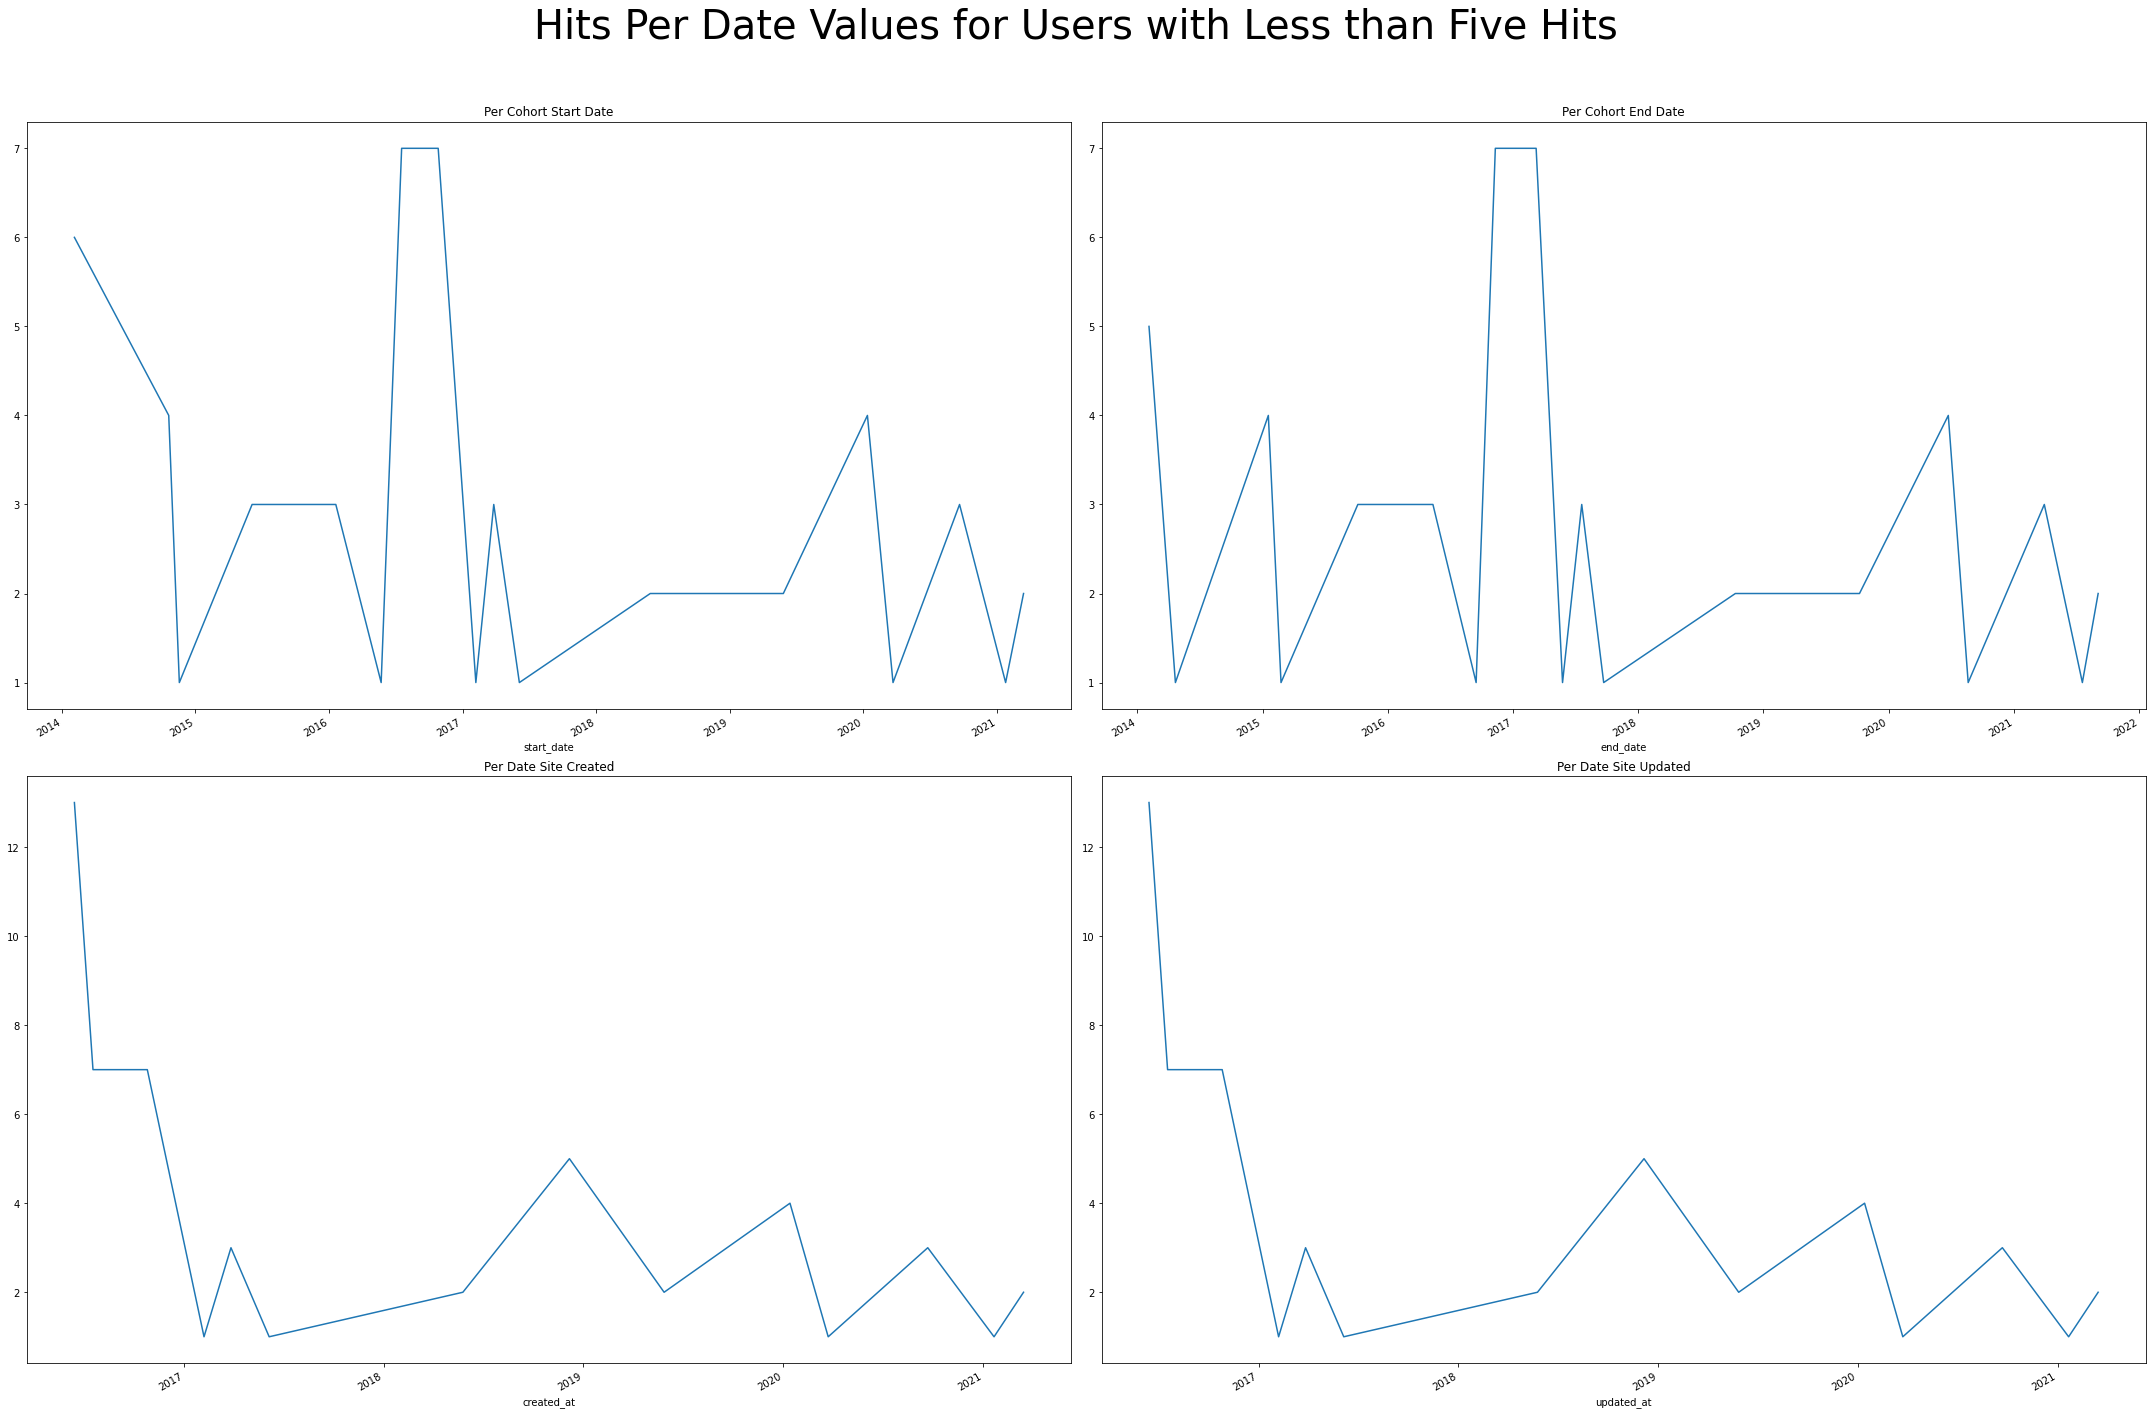

In [570]:
fig, axs = plt.subplots(ncols=2, nrows = 2, figsize = (30, 20))
fig.suptitle('Hits Per Date Values for Users with Less than Five Hits', fontsize = 40)

less_than_five_df.groupby('start_date').ip.count().plot(ax=axs[0, 0]).set(Title = "Per Cohort Start Date")

less_than_five_df.groupby('end_date').ip.count().plot(ax=axs[0, 1]).set(Title = "Per Cohort End Date")

less_than_five_df.groupby('created_at').ip.count().plot(ax=axs[1, 0]).set(Title = "Per Date Site Created")

less_than_five_df.groupby('updated_at').ip.count().plot(ax=axs[1, 1]).set(Title = "Per Date Site Updated")

fig.tight_layout()
fig.subplots_adjust(top=0.9)

